### Proximal Point Algorithm

In [37]:
# Proximal Point Algorithm
import numpy as np
from scipy.optimize import minimize
from warnings import filterwarnings
import matplotlib.pyplot as plt
filterwarnings('ignore')

def quadratic_function(x):
    """Example quadratic function: f(x) = 0.5 * x^2"""
    return 0.5*np.dot(x,x)

def proximal_operator(f, x_t, lam_t):
    """Proximal operator for the given function f and parameter lam_t."""
    def objective(x):
        return f(x) + (1 / (2 * lam_t)) * np.linalg.norm(x - x_t) ** 2
    
    res = minimize(objective, x_t)
    return res.x

def proximal_point_algorithm(f, x0, lam_schedule, tol=1e-5, max_iter=1000):
    """Proximal Point Algorithm to minimize function f."""
    x = x0
    sol_array = []
    iteration_count = 0
    for t in range(1, max_iter + 1):
        lam_t = lam_schedule(t)
        x_new = proximal_operator(f, x, lam_t)
        if np.linalg.norm(x_new - x) < tol:
            iteration_count = t
            sol_array.append(x_new)
            break
        x = x_new
        sol_array.append(x)
        
    return x, iteration_count, sol_array

# Example usage
x0 = np.array([10.0])  # Initial point
lam_schedule1 = lambda t: 0.1  # Constant step size for simplicity
lam_schedule2 = lambda t: 0.1*t
min_x, itnum2, sols2 = proximal_point_algorithm(quadratic_function, x0, lam_schedule1)
min_x2, itnum, sols = proximal_point_algorithm(quadratic_function, x0, lam_schedule2)

print("The minimum value of x is:", min_x)


The minimum value of x is: [0.00010782]


### Proximal Point Algorithm Graph

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


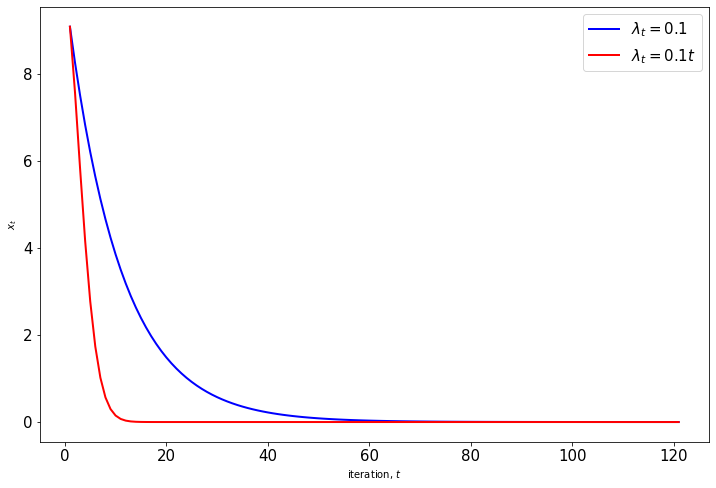

In [38]:
def refill(diff, arr):
    partial = []
    for i in range(diff):
        partial.append(np.array([0]))
    return arr + partial

# Proximal Point Algorithm plot code
def plot_res(itnum, sols, itnum2=0, sols2=[], color=['blue','red'], \
             labels=[], savename=''):
    plt.figure(figsize=(12,8))
    two_flag = False
    if (itnum and itnum2):
        two_flag = True
        if (itnum2 != itnum):
            if (itnum2 < itnum):
                diff = itnum - itnum2
                good1 = refill(diff, sols2)
                good2 = sols
                bigg = itnum
            else:
                diff = itnum2 - itnum
                good1 = sols2
                good2 = refill(diff, sols)
                bigg = itnum2
            
            plt.plot(range(1,bigg + 1), good1, label=labels[0], color=color[0], lw=2)
            plt.plot(range(1,bigg + 1), good2, label=labels[1], color=color[1], lw=2)
        
    else:
        plt.plot(range(1,itnum + 1), sols, label=labels[0], color=color[0], lw=2)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("iteration, $t$")
    plt.ylabel("$x_t$")
    plt.title("")
    if (savename):
        plt.savefig(f'{savename}.png')
        plt.savefig(f'{savename}.eps')

# Graph command
plot_res(itnum, sols, itnum2, sols2, savename="PMA", \
         labels=[r'$\lambda_t = 0.1$', r'$\lambda_t = 0.1t$'])

### Proximal Gradient Algorithm

In [39]:
# Proximal Gradient Algorithm
import numpy as np
import matplotlib.pyplot as plt

def prox_abs_shifted(v, lam, shift):
    """
    Proximal operator for the function h(x) = |x - shift|.
    """
    return np.sign(v - shift) * np.maximum(np.abs(v - shift) - lam, 0) + shift

def gradient_g(x):
    """
    Gradient of the smooth part g(x) = x^2.
    """
    return 2 * x

def objective_function(x):
    """
    Objective function f(x) = |x - 2| + x^2.
    """
    return np.abs(x - 2) + x**2

def proximal_gradient_method(initial_x, lambda_0, max_iter=100, tol=1e-6):
    x_t = initial_x
    x_values = [x_t]
    x1_values = [x_t]
    x2_values = [x_t]
    x3_values = [x_t]
    f_values = [objective_function(x_t)]
    f1_values = [objective_function(x_t)]
    f2_values = [objective_function(x_t)]
    f3_values = [objective_function(x_t)]

    for t in range(max_iter):
        # Compute the step size for the current iteration
        lambda_t = lambda_0 / np.sqrt(t + 1)
        
        # Compute the gradient of g at x_t
        grad_g = gradient_g(x_t)
        
        # Compute the proximal operator
        x_next = prox_abs_shifted(x_t - lambda_t * grad_g, lambda_t, shift=2)
        
        # Store the values for plotting
        x_values.append(x_next)
        f_values.append(objective_function(x_next))
        
        # Check for convergence
        if np.abs(x_next - x_t) < tol:
            break
        
        # Update x_t
        x_t = x_next
    
    return x_t, x_values, f_values

# Parameters
initial_x = 10  # Starting point
lambda_0 = 1  # Initial step size
lambda_1 = 2
lambda_2 = 3
lambda_3 = 4
max_iter = 1000  # Maximum number of iterations

# Find the minimizer
minimizer, x_values, f_values =\
proximal_gradient_method(initial_x, lambda_0, max_iter)
minimizer1, x1_values, f_values =\
proximal_gradient_method(initial_x, lambda_1, max_iter)
minimizer2, x2_values, f_values = \
proximal_gradient_method(initial_x, lambda_2, max_iter)
minimizer3, x3_values, f_values = \
proximal_gradient_method(initial_x, lambda_3, max_iter)

print("Minimizer:", minimizer)
print("Minimizer:", minimizer1)
print("Minimizer:", minimizer2)
print("Minimizer:", minimizer3)

Minimizer: 0.5
Minimizer: 0.5
Minimizer: 0.4999991725431039
Minimizer: 0.49999973915057927


### Convergence path of the Minimizer

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


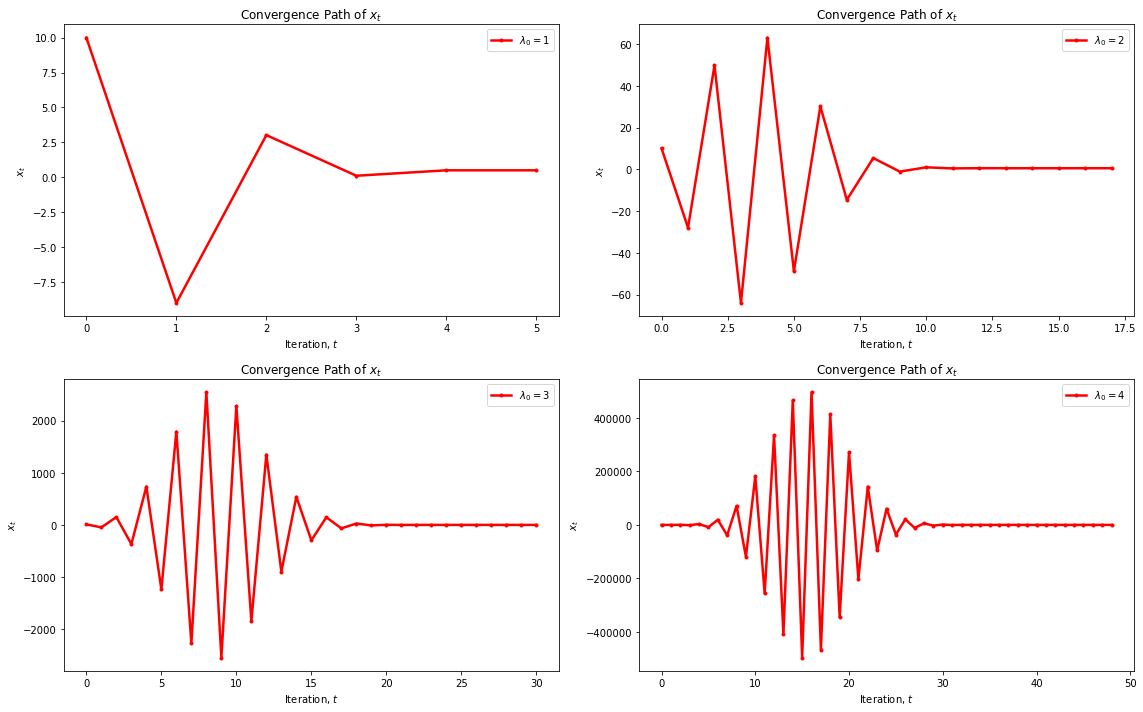

In [36]:
# Subplot of the Results Obtained from the Proximal Gradient Algorithm
fig, axs = plt.subplots(2,2, figsize=(16, 10))
axs[0,0].plot(x_values, marker='.', color='red',label="$\lambda_0 = 1$",linewidth=2.5)
axs[0,1].plot(x1_values,  marker='.', color='red', label="$\lambda_0 = 2$", linewidth=2.5)
axs[1,0].plot(x2_values,  marker='.', color='red', label="$\lambda_0 = 3$", linewidth=2.5)
axs[1,1].plot(x3_values,  marker='.', color='red', label="$\lambda_0 = 4$", linewidth=2.5)
axs[0,0].set_title('Convergence Path of $x_t$')
axs[0,1].set_title('Convergence Path of $x_t$')
axs[1,0].set_title('Convergence Path of $x_t$')
axs[1,1].set_title('Convergence Path of $x_t$')
axs[0,0].set_xlabel("Iteration, $t$")
axs[0,0].set_ylabel("$x_t$")
axs[0,1].set_xlabel("Iteration, $t$")
axs[0,1].set_ylabel("$x_t$")
axs[1,0].set_xlabel("Iteration, $t$")
axs[1,0].set_ylabel("$x_t$")
axs[1,1].set_xlabel("Iteration, $t$")
axs[1,1].set_ylabel("$x_t$")
fig.tight_layout()
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
plt.savefig("PGA01.eps")